TASK 1, QUESTION 1

In [ ]:
!pip install bs4


In [10]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import yfinance as yf
import requests
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, norm

In [3]:
companies = [
    "ADANIENT",
    "ADANIPORTS",
    "APOLLOHOSP",
    "ASIANPAINT",
    "AXISBANK",
    "BAJAJ-AUTO",
    "BAJAJFINSV",
    "BAJFINANCE",
    "BEL",
    "BHARTIARTL",
    "BPCL",
    "BRITANNIA",
    "CIPLA",
    "COALINDIA",
    "DRREDDY",
    "EICHERMOT",
    "GRASIM",
    "HCLTECH",
    "HDFCBANK",
    "HDFCLIFE",
    "HEROMOTOCO",
    "HINDALCO",
    "HINDUNILVR",
    "ICICIBANK",
    "INDUSINDBK",
    "INFY",
    "ITC",
    "JSWSTEEL",
    "KOTAKBANK",
    "LT",
    "M&M",
    "MARUTI",
    "NESTLEIND",
    "NTPC",
    "ONGC",
    "POWERGRID",
    "RELIANCE",
    "SBILIFE",
    "SBIN",
    "SHRIRAMFIN",
    "SUNPHARMA",
    "TATACONSUM",
    "TATAMOTORS",
    "TATASTEEL",
    "TCS",
    "TECHM",
    "TITAN",
    "TRENT",
    "ULTRACEMCO",
    "WIPRO"
]


In [4]:
def extract_stock_information(stock_symbol):
    r = requests.get(f'https://www.screener.in/company/{stock_symbol}/')
    soup = BeautifulSoup(r.content, 'html.parser')
    top_sec = soup.find("div", {"id": "top"})
    pnl_sec = soup.find("section", {"id": "profit-loss"})
    ratio_collection = top_sec.find("ul", {"id": "top-ratios"})
    ratio_elements = ratio_collection.find_all("li")
    ratio_elements = ratio_elements[0:4]
    numeric_values = []
    for ratio in ratio_elements:
        for elements in ratio.find_all("span",{"class": "number"}):
            numeric_values.append(elements.text)
    metric_labels = ["MarketCap", "LTP", "High", "Low", "PE"]
    stock_data = {}
    for i in range(len(metric_labels)):
        stock_data[metric_labels[i]] = numeric_values[i]
    input_string = top_sec.find("span", {"class":"font-size-12"}).get_text()
    match = re.search(r"-?\s*\d+\.\d+", input_string)
    if match:
        stock_data["PercentChange"] = float(match.group().replace(" ", ""))
    stock_data["EPS"] = pnl_sec.find_all("tr")[11].find_all("td")[12].text
    return stock_data

In [5]:
def calculate_stock_performance(ticker):
    end_date = datetime.now()
    time_periods = {
        '6M': end_date - timedelta(days=180),
        '1Y': end_date - timedelta(days=365),
        '3Y': end_date - timedelta(days=365*3),
        '5Y': end_date - timedelta(days=365*5)
    }
    stock = yf.Ticker(ticker)
    returns = {}
    for period_name, start_date in time_periods.items():
        hist_data = stock.history(start=start_date, end=end_date)
        if len(hist_data) == 0:
          returns[period_name] = None
        start_price = hist_data['Close'].iloc[0]
        end_price = hist_data['Close'].iloc[-1]
        return_pct = ((end_price - start_price) / start_price) * 100
        returns[period_name] = round(return_pct, 2)
        if period_name == "1Y":
          returns["volume"] = hist_data['Volume'].mean()
    return returns

In [6]:
df = []
for company in companies:
  ratios_details = extract_stock_information(company)
  return_details = calculate_stock_performance(f'{company}.NS')
  df.append({"ticker": company, **ratios_details,**return_details})

In [7]:
df = pd.DataFrame(df)



In [8]:
df

,ticker,MarketCap,LTP,High,Low,PE,PercentChange,EPS,6M,1Y,volume,3Y,5Y
0,ADANIENT,"2,91,725","2,528","3,744","2,025",107,0.94,24.95,-23.62,-15.17,2.427076e+06,48.77,1108.52
1,ADANIPORTS,"2,72,167","1,260","1,621",987,109,1.28,8.05,-12.81,15.63,4.772783e+06,72.14,251.77
2,APOLLOHOSP,"1,04,380","7,259","7,545","5,285",93.0,0.45,70.28,16.58,32.34,4.305613e+05,40.92,439.99
3,ASIANPAINT,"2,30,941","2,408","3,423","2,354",50.3,0.76,55.48,-17.36,-26.92,1.316979e+06,-25.02,43.49
4,AXISBANK,"3,55,330","1,148","1,340",996,13.6,0.22,80.55,-3.60,3.39,9.910075e+06,62.50,54.65
5,BAJAJ-AUTO,"2,51,929","9,021","12,774","6,232",30.8,0.65,267.88,-9.04,40.66,5.150039e+05,198.94,228.63
6,BAJAJFINSV,"2,68,191","1,680","2,030","1,419",173,0.02,7.33,5.18,-2.54,1.626828e+06,0.71,79.84
7,BAJFINANCE,"4,44,613","7,183","7,830","6,188",32.7,0.80,204.27,-1.58,-4.86,1.215040e+06,3.52,76.62
8,BEL,"2,30,733",316,340,164,50.8,0.86,5.50,-0.55,84.62,3.119461e+07,379.36,949.02
9,BHARTIARTL,"10,07,452","1,682","1,779",960,133,4.42,8.82,18.40,70.78,6.673719e+06,150.43,296.57


QUESTION 2

[*********************100%***********************]  1 of 1 completed


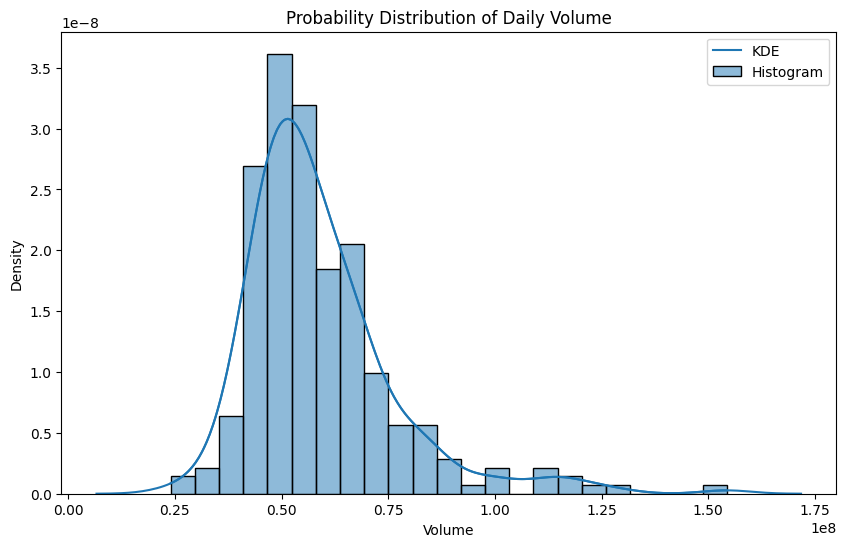

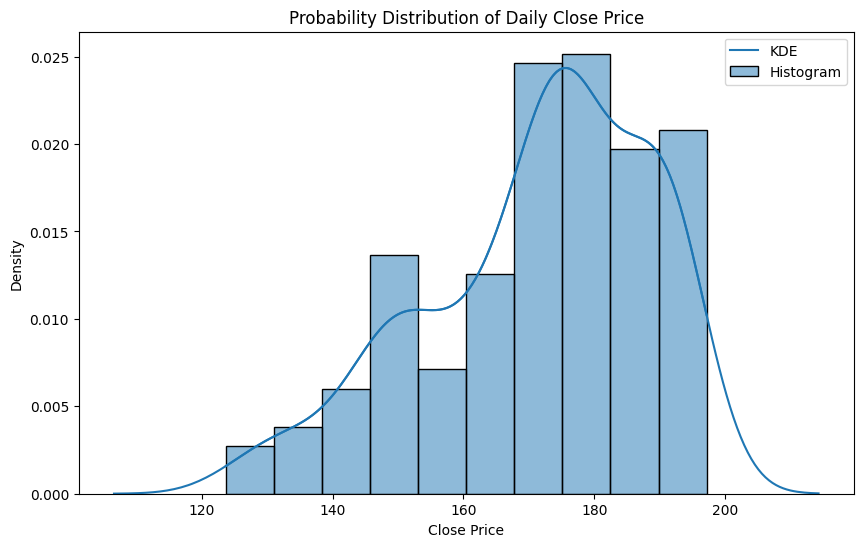

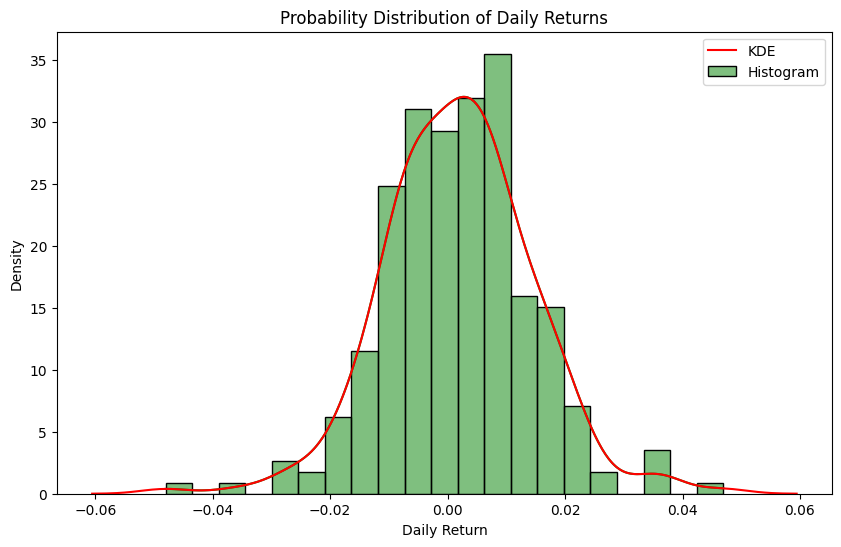

Price,Adj Close,Close,High,Low,Open,Volume,Daily Return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,,
2023-01-04,125.045044,126.360001,128.660004,125.080002,126.889999,89113600,0.010314
2023-01-05,123.718971,125.019997,127.769997,124.760002,127.129997,80962700,-0.010605
2023-01-06,128.271103,129.619995,130.289993,124.889999,126.010002,87754700,0.036794
2023-01-09,128.795624,130.149994,133.410004,129.889999,130.470001,70790800,0.004089
2023-01-10,129.369568,130.729996,131.259995,128.119995,130.259995,63896200,0.004456
...,...,...,...,...,...,...,...
2023-12-22,192.656174,193.600006,195.410004,192.970001,195.179993,37122800,-0.005548
2023-12-26,192.108856,193.050003,193.889999,192.830002,193.610001,28919300,-0.002841


In [17]:
def analyze_stock_performance(stock_ticker='AAPL',
                               start_date='2023-01-01',
                               end_date='2023-12-31'):
    data = yf.download(stock_ticker, start=start_date, end=end_date)
    data['Daily Return'] = data['Adj Close'].pct_change()
    clean_data = data.dropna()

    def calculate_statistics(series, confidence=0.95):
        n = len(series)
        mean = series.mean()
        std_dev = series.std()
        z_critical = norm.ppf((1 + confidence) / 2)
        t_critical = t.ppf((1 + confidence) / 2, df=n-1)
        margin_of_error_z = z_critical * (std_dev / np.sqrt(n))
        margin_of_error_t = t_critical * (std_dev / np.sqrt(n))
        ci_z = (mean - margin_of_error_z, mean + margin_of_error_z)
        ci_t = (mean - margin_of_error_t, mean + margin_of_error_t)
        return {
            'mean': mean,
            'std_dev': std_dev,
            'z_critical': z_critical,
            't_critical': t_critical,
            'margin_of_error_z': margin_of_error_z,
            'margin_of_error_t': margin_of_error_t,
            'ci_z': ci_z,
            'ci_t': ci_t
        }

    volume_stats = calculate_statistics(clean_data['Volume'])
    close_stats = calculate_statistics(clean_data['Adj Close'])
    return_stats = calculate_statistics(clean_data['Daily Return'].dropna())

    def plot_distribution(series, title, xlabel):
        plt.figure(figsize=(10, 6))
        sns.histplot(series, kde=True, color='green', stat="density", label="Histogram")
        sns.kdeplot(series, color='red', label="KDE")
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel("Density")
        plt.legend()
        plt.show()

    plot_distribution(clean_data['Volume'], "Probability Distribution of Daily Volume", "Volume")
    plot_distribution(clean_data['Adj Close'], "Probability Distribution of Daily Close Price", "Close Price")
    plot_distribution(clean_data['Daily Return'].dropna(), "Probability Distribution of Daily Returns", "Daily Return")

    return clean_data

analyze_stock_performance()
